In [81]:
# Importing necessary libraries
import category_encoders as ce
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


In [97]:
# Read the csv file 
train_df = pd.read_csv("data//train_heart.csv")
train_df
# Display basic information about the dataset
print("Dataset Information:")
print(train_df.info())

# Display descriptive statistics of the dataset
print("\nDescriptive Statistics:")
print(train_df.describe())

# Check for missing values
print("\nMissing Values:")
print(train_df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              642 non-null    int64  
 1   Age             642 non-null    int64  
 2   Sex             642 non-null    object 
 3   ChestPainType   642 non-null    object 
 4   RestingBP       642 non-null    int64  
 5   Cholesterol     642 non-null    int64  
 6   FastingBS       642 non-null    int64  
 7   RestingECG      642 non-null    object 
 8   MaxHR           642 non-null    int64  
 9   ExerciseAngina  642 non-null    object 
 10  Oldpeak         642 non-null    float64
 11  ST_Slope        642 non-null    object 
 12  HeartDisease    642 non-null    int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 65.3+ KB
None

Descriptive Statistics:
               id         Age   RestingBP  Cholesterol  FastingBS       MaxHR  \
count  642.000000  642.00

In [98]:
# Define the list of features to be used for training
x_types = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Extract the training data with the selected features
x = train_df[x_types]

# Extract the target variable
y = train_df[['HeartDisease']]

In [99]:
# Define the ordinal encoder with specified columns
ce_ord = ce.OrdinalEncoder(cols=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

# Apply ordinal encoding to the features
x = ce_ord.fit_transform(x)

# Print the transformed features
print(x)


     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     55    1              1        135          204          1           1   
1     67    1              1        160          286          0           2   
2     56    1              1        120            0          0           1   
3     56    1              2        120          236          0           3   
4     75    1              1        170          203          1           1   
..   ...  ...            ...        ...          ...        ...         ...   
637   50    1              2        170          209          0           1   
638   60    1              1        125            0          1           3   
639   50    2              3        140          288          0           3   
640   65    1              4        138          282          1           2   
641   65    1              1        134            0          0           3   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [85]:
# Split the dataset into training and testing sets
# X_train: training features
# X_test: testing features
# y_train: training target values
# y_test: testing target values
# random_state: seed for random number generation to ensure reproducibility
# test_size: proportion of the dataset to include in the testing set (25% in this case)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=104, test_size=0.25)

# Print the shapes of the training and testing sets to verify the split
print(X_train.shape)
print(X_test.shape)

(481, 11)
(161, 11)


In [103]:
# Create the linear regression model
model = LinearRegression()
# Reshape the training and testing features
X_train_reshaped = X_train.values.reshape(-1, len(x_types))
X_test_reshaped = X_test.values.reshape(-1, len(x_types))

# No need to reshape the target values, keep them as 1D arrays
y_train_reshaped = y_train.values.ravel()
y_test_reshaped = y_test.values.ravel()

# Fit the model to the training data
model.fit(X_train_reshaped, y_train_reshaped)

# Make predictions using the testing set
y_pred = model.predict(X_test_reshaped)

# Evaluate the model on the testing data using mean squared error
mse = mean_squared_error(y_test_reshaped, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.10862828638987698


In [104]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_reshaped, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R2)
r_squared = r2_score(y_test_reshaped, y_pred)
print("R-squared (R2):", r_squared)

Mean Squared Error (MSE): 0.10862828638987698
Root Mean Squared Error (RMSE): 0.32958805559345894
R-squared (R2): 0.5529130181784692


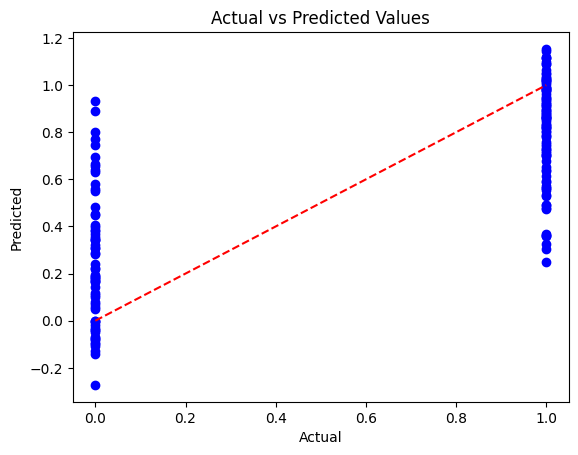

In [105]:

# Plotting actual vs predicted values
plt.scatter(y_test_reshaped, y_pred, color='blue')
plt.plot([y_test_reshaped.min(), y_test_reshaped.max()], [y_test_reshaped.min(), y_test_reshaped.max()], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


In [119]:
# Calculate correlation coefficients between features and target variable
correlation = X_train.corrwith(y_train).abs().sort_values(ascending=False)

# Select the top correlated feature with the target variable
top_feature_corr = correlation.index[0]
print("Top correlated feature based on correlation analysis:", top_feature_corr)

# Get the coefficients (weights) from the trained linear regression model
coefficients = pd.Series(model.coef_[0]).abs().sort_values(ascending=False)

# Select the top feature with the largest coefficient magnitude
top_feature_coef = X_train.columns[np.argmax(np.abs(model.coef_[0]))]
print("Top feature based on coefficients:", top_feature_coef)


Top correlated feature based on correlation analysis: Age
Top feature based on coefficients: Age


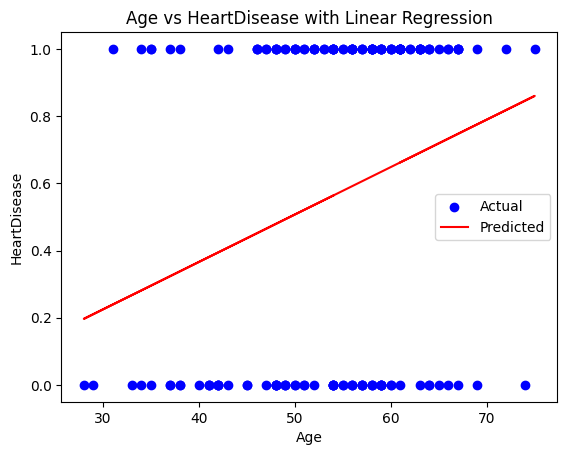

In [120]:
# Creating the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train[[top_feature_corr]], y_train)

# Making predictions using the testing set
y_pred_age = model.predict(X_test[[top_feature_corr]])

# Plotting Age vs HeartDisease with the regression line
plt.scatter(X_test[top_feature_corr], y_test, color='blue', label='Actual')
plt.plot(X_test[top_feature_corr], y_pred_age, color='red', label='Predicted')
plt.xlabel(top_feature_corr)
plt.ylabel('HeartDisease')
plt.title('Age vs HeartDisease with Linear Regression')
plt.legend()
plt.show()